### 1. The problem statement
Online reviews are generated in an eort to improve and enhance their busines-
ses, online retailers and service. Online reviews are helpful but blindly trust of
these reviews is dangerous for both the seller and buyer. Many people make
read online reviews before placing any order; however, the reviews may be faked
for prot or gain. So to its necessary to decide whether the review is fake or
truth more cautiously. This chapter deals with nding fake reviewers based on
some characteristics features.\\
In the literature, fake reviews are categorized into three groups, proposed by
Dixit et al. [2]: (1) Untruthful Reviews  the main concern of this paper, (2)
Reviews on Brands  where the comments are only concerned with the brand
or the seller of the product and fail to review the product, and (3) Non-Reviews
are those reviews that contain either unrelated text or advertisements. The first
category, untruthful reviews, is of most concern as they undermine the integrity
of the online review system. Detection of this type 1 review is a challenging
task. It is impossible, to distinguish between fake and real reviews by manually
reading them. As a human judge it is difficult to confidently ascertain which
review is fake and which is authentic.

### 2. Data science to identify fake reviewers
As of 2014 there were over 18 million reviews created on Yelp. Online reviews
are constantly being generated on various web sites across the Internet. Hence,
Big Data techniques are needed to address the problem of fake reviewers. Big
Data, is often quantied with the Four V's (1) Volume  the sheer size and scale
of the data, (2) Velocity  the rate at which new data is created and consu-
med by processing engines, (3) Variety  the dierent formats that data may
be stored in, and (4) Veracity  the quality level of the data. The Volume and
Velocity of online reviews are noted by merely visiting e-commerce and custo-
mer rating sites, such as Yelp and Amazon. There is great Variety across the
possible industry sectors for reviews (such as hotels, restaurants, e-commerce,
home services, etc.), along with the multiplicity of languages that reviews are
written in. Veracity is a problem with online reviews, the vast majority of re-
views are unlabeled, which means it is not easily known whether the review
is fake or not. Thus, review spam detection is a Big Data problem, as there
are numerous challenges when analyzing and classifying varying reviews from
disconnected sources.
### 3. What kind of problem is it ?
The problem is classication problem (1) Fake reviewer (2) Real reviewer. The
training dataset is hand labeled to fake or real review and is veried from Review Skeptic (http://reviewskeptic.com/) . Based on the training set the test set is classified to fake and real reviews.

### 4. Data set
The data set is very large with many features. However, it is difficult to hand
label all the reviews. So only 200 reviews are labeled.
### 5. Feature Engineering
In this problem a mix of categorical feature and cardinal (continuous) features
are used. The problem is tested with categorical feature and continuous features
in the beginning, then tested with only categorical and only continuous features.
Finally, a bunch of features having sparse matrix is included.

In [1]:
import pandas as pd
import json
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
from sklearn import linear_model
from datetime import datetime
from scipy.stats import skew
from mpl_toolkits.mplot3d import Axes3D
userdatapath = '/home/titli/Documents/Springboard1/test.csv'
selecteddatapath = '/home/titli/Documents/Springboard1/test1.csv'
reviewfile= '/home/titli/Documents/Springboard1/dataset/review.json'
businessfile = '/home/titli/Documents/Springboard1/dataset/business.json'
numsamples=1000
rowsamples=200
pd.options.display.max_columns = 200

/home/titli/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#create an empty dataframe with column names
COLUMN_NAMES=['true_pos','false_pos','false_neg', 'true_neg', 'recall','prec','F1']
Method = ['Logistic Regression', 'RandomForest', 'KMeans' , 'svm', 'MultinomialNB' ]
machlearn_train = pd.DataFrame(np.random.randn(20, 7), columns=COLUMN_NAMES)
#machlearn_train['Method']=Method
machlearn_test = pd.DataFrame(np.random.randn(20, 7), columns=COLUMN_NAMES)
#machlearn_test['Method']=Method

In [3]:
old=pd.read_csv(userdatapath, header=0,  index_col=0, nrows=numsamples)

#100 points

selectedrows=[0,8,12,15,19,25,28,29,45,47,53,54,65,71,85,87,94,101,106,114,126,127,174,175, \
              176,177,178,193,197,206,209,210,222,224,227,244,248,250,255,258, \
              275,276,279,284,289,290,303,309,313,326,331,332,338,349,356,364,366,381,387,390,392,397,\
              404,408,418,444,445,455,470,474,480,482,489,495,497,500,507,517,520,529, \
              1,2,3,4,5,6,7,9,10,13,17,18,21,24,26,27,30,31,32,33,34,35, \
              183,184,185,186,187,190,194,196,199,201,205,208,232,235,240,249,266,269,\
              327,328,329,333,334,335, 336,337,339,340,341,342,343,345,346,347,350,351,352,353,359,360,362,\
              363,365,367,368,369,627,374,376,380,382,383,385,386,388, \
              128,136,142,149,153,155,167,268,274,555,569,582,583,591,597,601,611,614,622,631, \
              36,37,38,39,40,42,43,44,270,273,389,391,393,394,395,396,400,471,473,479,623,624,626]                         
              
              
#fake=174,175,176,177,178,193,197,206,209,210,222,224,227,244,248,250,255,258,268,274,275,276,279,284,289,290,303, \
#309,313,326
#183,184,185,186,187,190,194,196,199,201,205,208,232,235,240,249,266,269,270,273,278,281,282,283,285,286,287,291,292,293,\
#295,296,324,325
inter=[]
for row in selectedrows:
    line= old.iloc[row]
    inter.append(line)
old_1=pd.DataFrame(inter)
old_1.set_index('user_id')
old_1.head(10)
old_1.to_csv(selecteddatapath)
small= pd.read_csv(selecteddatapath, header=0)
cols = 'average_stars 	review_count compliment_cool 	compliment_cute 	compliment_funny 	 \
compliment_hot 	compliment_list 	compliment_more 	compliment_note 	compliment_photos 	 \
compliment_plain 	cool  	fans funny '.split()
old_2=small[cols]
old_2.head()

,average_stars,review_count,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,cool,fans,funny
0,4.67,8,0,0,0,0,0,0,0,0,1,0,0,0
1,1.00,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1.67,2,0,0,0,0,0,0,0,0,0,0,0,0
3,3.00,2,0,0,0,0,0,0,0,0,0,1,0,0
4,3.73,48,1,0,1,2,0,0,1,0,1,2,3,6


In [4]:
from pandas.io.json import json_normalize
def getreviews(user_ids):
    """ gets one text review for each user in user_ids list"""
    result=[]
    with open(reviewfile) as f:
         for line in f:
             record = json.loads(line)
             if record['user_id'] in user_ids: 
                result.append(record)
             if len(result) >= 1000:  #numsamples
                break
    reviewdata = pd.DataFrame(result)
    return reviewdata

In [5]:
user_ids=[]
for counter, value in enumerate(selectedrows):
    user_ids.append(old['user_id'].iloc[value])
review_texts_all = getreviews(user_ids)

In [6]:
review_texts_all.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,K1tLIHP5DLZG5NYIt83iYA,0,2017-10-02,0,7AIRjMM5y80d8WlcyY32uQ,5,Ken and Debra are amazing real estate agents! ...,0,RJaOM110aQlyfab_mYBw4w
1,PmgbmK6wG0S-Nndo1becBA,0,2016-04-23,0,z8OYnWR_s62vtHp5GCmEWQ,1,Absolute worst service. I have never been trea...,1,akFg3cvYqbihkdYUIjTauQ
2,rL-hprXkcvfYSL9kWBFglQ,0,2014-02-23,0,JCUtZ8QvWDdjSEm7Km9W-w,5,I will be back. Unlike the old Native New Yor...,0,ddhNJ-nbjwjHoSth6qXJ8g
3,p_22wrx3GmAzlbrGA6LyYg,0,2014-03-10,0,-nj0swfsRUk83zgpWibT0A,5,Proud to support family owned restaurant. I l...,0,ddhNJ-nbjwjHoSth6qXJ8g
4,_ZfjpSEO5ntk-1hbnwCR4g,0,2015-10-10,1,fVL9vfsWydvzxVfmEiERtg,2,Stayed here for a few nights on a random getaw...,0,gb8PYSCKlvPbMWnqIWXmlQ


In [7]:
df1=[]
for i in range(rowsamples):
    data = review_texts_all[review_texts_all.user_id == user_ids[i]]
    n = review_texts_all[review_texts_all.user_id == user_ids[i]].count()
    if len(n) > 1:
       data1 = data.iloc[0]
       df1.append(data1)

review_texts = pd.DataFrame(df1)

In [8]:
df1 = []
for k in range(rowsamples):
    df1.append({'rev_length': len(review_texts['text'].iloc[k]), 'rev_use': review_texts['useful'].iloc[k],\
               'rev_stars': review_texts['stars'].iloc[k], 'rev_date': review_texts['date'].iloc[k], \
               'rev_buss': review_texts['business_id'].iloc[k]})
revlen=pd.DataFrame(df1)

In [9]:
df1 = []
for k in range(rowsamples):
    
    label=0
    Xlen=old_1['review_count'].iloc[k]
    
    if Xlen<2:
       label=0
    elif np.logical_and((Xlen>=2), (Xlen<=20)):
       label=1
    elif np.logical_and((Xlen>20), (Xlen<=50)):
       label=2
    elif np.logical_and((Xlen>50), (Xlen<=100)):
       label=3
    else:
      label=4
    df1.append({'rev_count_label': label})    
Xlen_label=pd.DataFrame(df1)

In [10]:
df2 = []
for k in range(0,rowsamples):
    count=0
    label=0
    Xfrnd=(old_1['friends'].iloc[[k]].values).tolist()
    dfrnd = (", ".join(Xfrnd)).split(',')[1:-1]
    if dfrnd is None:
       break
    else:
       count=len(dfrnd)
       if count==0:
          label=0
       elif np.logical_and((count>0), (count<=50)):
          label=1
       elif np.logical_and((count>50), (count<=100)):
          label=2
          
       else:
          label=3
       df2.append({'friend_count': count,'friend_label': label})    
frnd=pd.DataFrame(df2)

In [11]:
from pandas.io.json import json_normalize
def getbusiness(business_ids):
    """ gets stars review for each business in business_ids list"""
    result=[]
    with open(businessfile) as f:
         for line in f:
             record = json.loads(line)
             if record['business_id'] in business_ids: 
                result.append(record)
             if len(result) >= numsamples:
                break
    businessdata = pd.DataFrame(result)
    return businessdata

In [12]:
business_ids = revlen['rev_buss'].iloc[:numsamples].values.tolist()
businessstars = pd.DataFrame({'buss_star': getbusiness(business_ids)['stars']})

In [13]:
from nltk.stem import WordNetLemmatizer
from collections import Counter
from nltk.corpus import stopwords
from nltk import pos_tag, word_tokenize
english_stops = set(stopwords.words('english'))
def alphalength(text):
# Import WordNetLemmatizer
    tokens = word_tokenize(text)
    lower_tokens = [t.lower() for t in tokens]
# Retain alphabetic words: alpha_only
    alpha_only = [t for t in lower_tokens if t.isalpha()]

    length_alpha = len(alpha_only)

# Print the 10 most common tokens
    return(length_alpha)

In [14]:
df1=[]
for i in range(rowsamples):
    a1=alphalength(review_texts['text'].iloc[i])
    df1.append(a1)
Alphalength=pd.DataFrame({'alpha_length': df1})
Alphalength.head()


,alpha_length
0,98
1,139
2,46
3,35
4,279


In [15]:
from nltk.stem import WordNetLemmatizer
from collections import Counter
from nltk.corpus import stopwords
from nltk import pos_tag, word_tokenize
english_stops = set(stopwords.words('english'))
def wordstop(text):
# Import WordNetLemmatizer
    tokens = word_tokenize(text)
    lower_tokens = [t.lower() for t in tokens]
# Retain alphabetic words: alpha_only
    alpha_only = [t for t in lower_tokens if t.isalpha()]

       
    # Remove all stop words: no_stops
    no_stops = [t for t in alpha_only if t not in english_stops]

    length_alpha = len(no_stops)
    
# Print the 10 most common tokens
    return(length_alpha)

In [16]:
df1=[]
for i in range(rowsamples):
    a1=wordstop(review_texts['text'].iloc[i])
    df1.append(a1)
stopwords=pd.DataFrame({'nostop_length': df1})
stopwords.head()


,nostop_length
0,46
1,72
2,18
3,18
4,137


In [17]:
from nltk.stem import WordNetLemmatizer
from collections import Counter
from nltk.corpus import stopwords
from nltk import pos_tag, word_tokenize
english_stops = set(stopwords.words('english'))
def wordlemmatize(text):
# Import WordNetLemmatizer
    tokens = word_tokenize(text)
    lower_tokens = [t.lower() for t in tokens]
# Retain alphabetic words: alpha_only
    alpha_only = [t for t in lower_tokens if t.isalpha()]

       
    # Remove all stop words: no_stops
    no_stops = [t for t in alpha_only if t not in english_stops]
    
    #  Instantiate the WordNetLemmatizer
    wordnet_lemmatizer = WordNetLemmatizer()
    # Lemmatize all tokens into a new list: lemmatized
    lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]
    
    length_lemmatize = len(lemmatized)
    
# Print the 10 most common tokens
    return(length_lemmatize)

In [18]:
df1=[]
for i in range(rowsamples):
    a1=wordlemmatize(review_texts['text'].iloc[i])
    df1.append(a1)
lemmatizewords=pd.DataFrame({'length_lemmatize': df1})
lemmatizewords.head()

,length_lemmatize
0,46
1,72
2,18
3,18
4,137


In [19]:
from nltk.stem import WordNetLemmatizer
from collections import Counter
from nltk.corpus import stopwords
from nltk import pos_tag, word_tokenize
english_stops = set(stopwords.words('english'))
def wordpos(text):
# Import WordNetLemmatizer
    tokens = word_tokenize(text)
    
    lower_tokens = [t.lower() for t in tokens]
    
    counts = Counter([j for i,j in pos_tag(lower_tokens)])

    return (counts)

In [20]:
df1=[]
for i in range(rowsamples):
    a1=wordpos(review_texts['text'].iloc[i])
    df1.append(a1)
Netpos=pd.DataFrame(df1)
Netpos.head()
POS_columns = 'NN 	NNP 	NNS 	PDT 	POS 	\
PRP 	PRP$ 	RB 	RBR 	RBS 	RP 		VB 	VBD 	VBG 	VBN 	\
VBP 	VBZ 	WDT 	WP 	WRB'.split()
postotal=Netpos[POS_columns]
postotal.fillna(value= 0.0, inplace=True)
postotal.head()

/home/titli/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


,NN,NNP,NNS,PDT,POS,PRP,PRP$,RB,RBR,RBS,RP,VB,VBD,VBG,VBN,VBP,VBZ,WDT,WP,WRB
0,22,0.0,3.0,0.0,1.0,8.0,3.0,8.0,0.0,0.0,0.0,5.0,5.0,0.0,4.0,1.0,3.0,1.0,0.0,1.0
1,30,0.0,8.0,0.0,0.0,5.0,9.0,9.0,0.0,0.0,0.0,7.0,11.0,1.0,4.0,3.0,1.0,1.0,0.0,1.0
2,10,0.0,3.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,2.0,6.0,0.0,2.0,2.0,1.0,0.0,1.0,0.0
3,6,0.0,3.0,0.0,0.0,4.0,1.0,4.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,55,0.0,9.0,0.0,0.0,13.0,4.0,17.0,1.0,0.0,0.0,14.0,15.0,3.0,10.0,6.0,16.0,1.0,2.0,1.0


In [21]:
d={'Faker':[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,\
            1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,\
            0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,\
            0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,\
            1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]}
faker= pd.DataFrame(data=d)
new = pd.concat([old_2,  revlen['rev_length'] , revlen['rev_stars'], revlen['rev_use'], frnd, Xlen_label, \
                 businessstars, Alphalength, lemmatizewords, postotal, faker], axis=1)
#
new['buss_star'].replace(to_replace= 'NaN', value=np.nan, inplace=True)
new['buss_star'].fillna(value= 1, inplace=True)  # business not found 
cleaned_data=new
dataset1=cleaned_data[cleaned_data['Faker']==1]
dataset0=cleaned_data[cleaned_data['Faker']==0]

cleaned_data.describe()



,average_stars,review_count,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,cool,fans,funny,rev_length,rev_stars,rev_use,friend_count,friend_label,rev_count_label,buss_star,alpha_length,length_lemmatize,NN,NNP,NNS,PDT,POS,PRP,PRP$,RB,RBR,RBS,RP,VB,VBD,VBG,VBN,VBP,VBZ,WDT,WP,WRB,Faker
count,200.000000,200.000000,200.000000,200.0,200.000000,200.000000,200.0,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,3.688800,8.280000,0.170000,0.0,0.170000,0.080000,0.0,0.035000,0.150000,0.080000,0.250000,0.385000,0.630000,0.750000,534.855000,3.645000,0.705000,13.735000,0.195000,0.855000,3.762500,98.620000,47.720000,19.630000,0.020000,3.935000,0.090000,0.180000,5.520000,2.420000,8.150000,0.160000,0.050000,0.53000,5.015000,7.220000,1.735000,1.945000,2.680000,2.035000,0.385000,0.360000,0.525000,0.500000
std,1.253741,16.662225,0.913935,0.0,0.913935,0.452353,0.0,0.306995,0.787784,0.752617,0.944436,1.558499,5.567593,4.385621,536.602446,1.662164,1.424119,58.262832,0.685071,0.660421,0.896584,101.510975,46.028302,18.610612,0.172478,4.260462,0.303911,0.537629,8.171503,2.887088,9.122147,0.442015,0.218492,1.10235,5.965123,8.557321,2.462742,2.429297,3.990894,3.295158,0.965107,0.820834,1.036701,0.501255
min,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9.000000,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,216.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.500000,39.000000,20.000000,8.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,3.000000,0.000000,0.000000,0.00000,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.915000,3.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,389.000000,5.000000,0.000000,0.000000,0.000000,1.000000,4.000000,72.500000,34.500000,14.000000,0.000000,3.000000,0.000000,0.000000,3.000000,1.000000,6.000000,0.000000,0.000000,0.00000,4.000000,5.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.500000
75%,5.000000,7.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,620.250000,5.000000,1.000000,0.000000,0.000000,1.000000,4.500000,113.000000,55.250000,22.250000,0.000000,5.000000,0.000000,0.000000,6.000000,3.000000,10.000000,0.000000,0.000000,1.00000,6.000000,9.000000,2.000000,3.000000,3.000000,3.000000,0.000000,0.000000,1.000000,1.000000
max,5.000000,154.000000,8.000000,0.0,8.000000,4.000000,0.0,4.000000,9.000000,10.000000,7.000000,15.000000,77.000000,56.000000,4950.000000,5.000000,10.000000,428.000000,3.000000,4.000000,5.000000,926.000000,407.000000,150.000000,2.000000,32.000000,2.000000,4.000000,77.000000,15.000000,93.000000,3.000000,1.000000,8.00000,52.000000,47.000000,15.000000,13.000000,43.000000,38.000000,9.000000,4.000000,8.000000,1.000000


### Find trend difference between Real and Fake reviewers

Text(0.5,0,'Average stars')

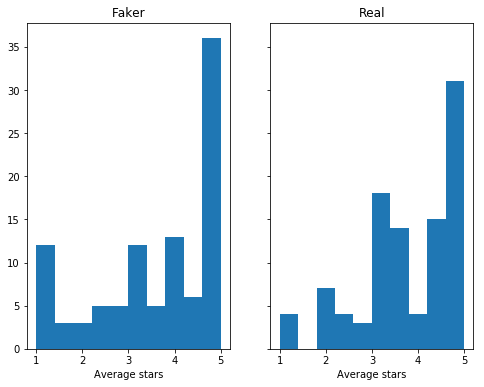

In [46]:
f,(ax1,ax2) = plt.subplots(1, 2, sharey='row', figsize=(8,6))
ax1.hist(dataset1['average_stars'], bins=10)
ax1.set_title('Faker')
ax1.set_xlabel('Average stars')
ax2.hist(dataset0['average_stars'],  bins=10)
ax2.set_title('Real')
ax2.set_xlabel('Average stars')

Multimodal distribution. Fake reviewers have more 1 star reviews.

Text(0.5,0,'Length without stop words')

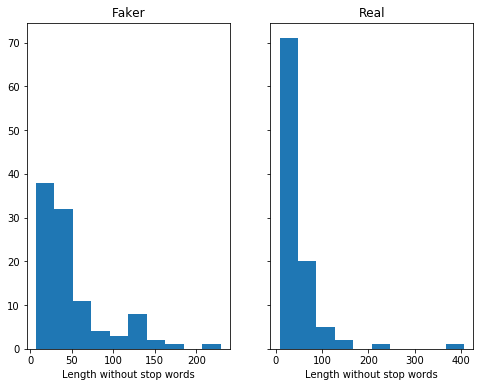

In [31]:
f,(ax1,ax2) = plt.subplots(1, 2, sharey='row', figsize=(8, 6))
ax1.hist(dataset1['length_lemmatize'], bins=10)
ax1.set_title('Faker')
ax1.set_xlabel('Length without stop words')
ax2.hist(dataset0['length_lemmatize'],  bins=10)
ax2.set_title('Real')
ax2.set_xlabel('Length without stop words')

Text(0.5,0,'Nouns used in review')

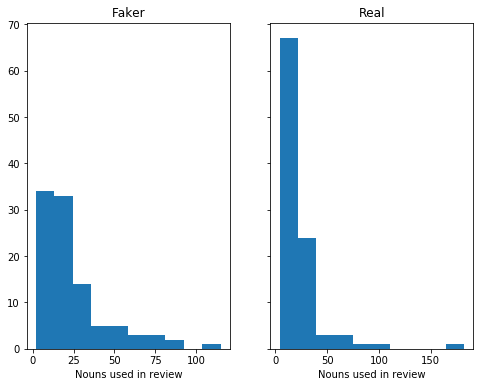

In [33]:
f,(ax1,ax2) = plt.subplots(1, 2, sharey='row', figsize=(8, 6))
Noun1=dataset1['NN'] + dataset1['NNP']+ dataset1['NNS']
Noun0=dataset0['NN'] + dataset0['NNP']+ dataset0['NNS']
ax1.hist(Noun1)
ax1.set_title('Faker')
ax1.set_xlabel('Nouns used in review')
ax2.hist(Noun0,  bins=10)
ax2.set_title('Real')
ax2.set_xlabel('Nouns used in review')

Fake reviewers use more nouns in reviews.

Text(0.5,0,'Verbs used in review')

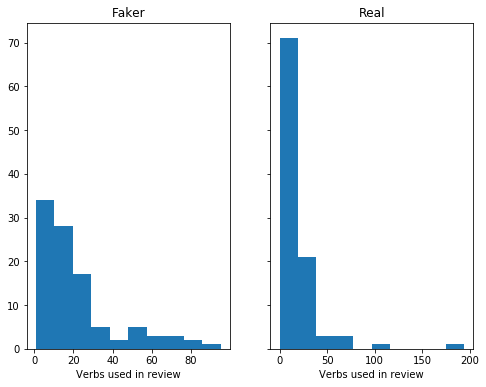

In [35]:
f,(ax1,ax2) = plt.subplots(1, 2, sharey='row', figsize=(8, 6))
verb1=dataset1['VB'] + dataset1['VBD']+ dataset1['VBG']+ dataset1['VBN']+ dataset1['VBP']+ dataset1['VBZ']
verb0=dataset0['VB'] + dataset0['VBD']+ dataset0['VBG']+ dataset0['VBN']+ dataset0['VBP']+ dataset0['VBZ']
ax1.hist(verb1, bins=10)
ax1.set_title('Faker')
ax1.set_xlabel('Verbs used in review')
ax2.hist(verb0,  bins=10)
ax2.set_title('Real')
ax2.set_xlabel('Verbs used in review')

Text(0.5,1,'Real reviewer')

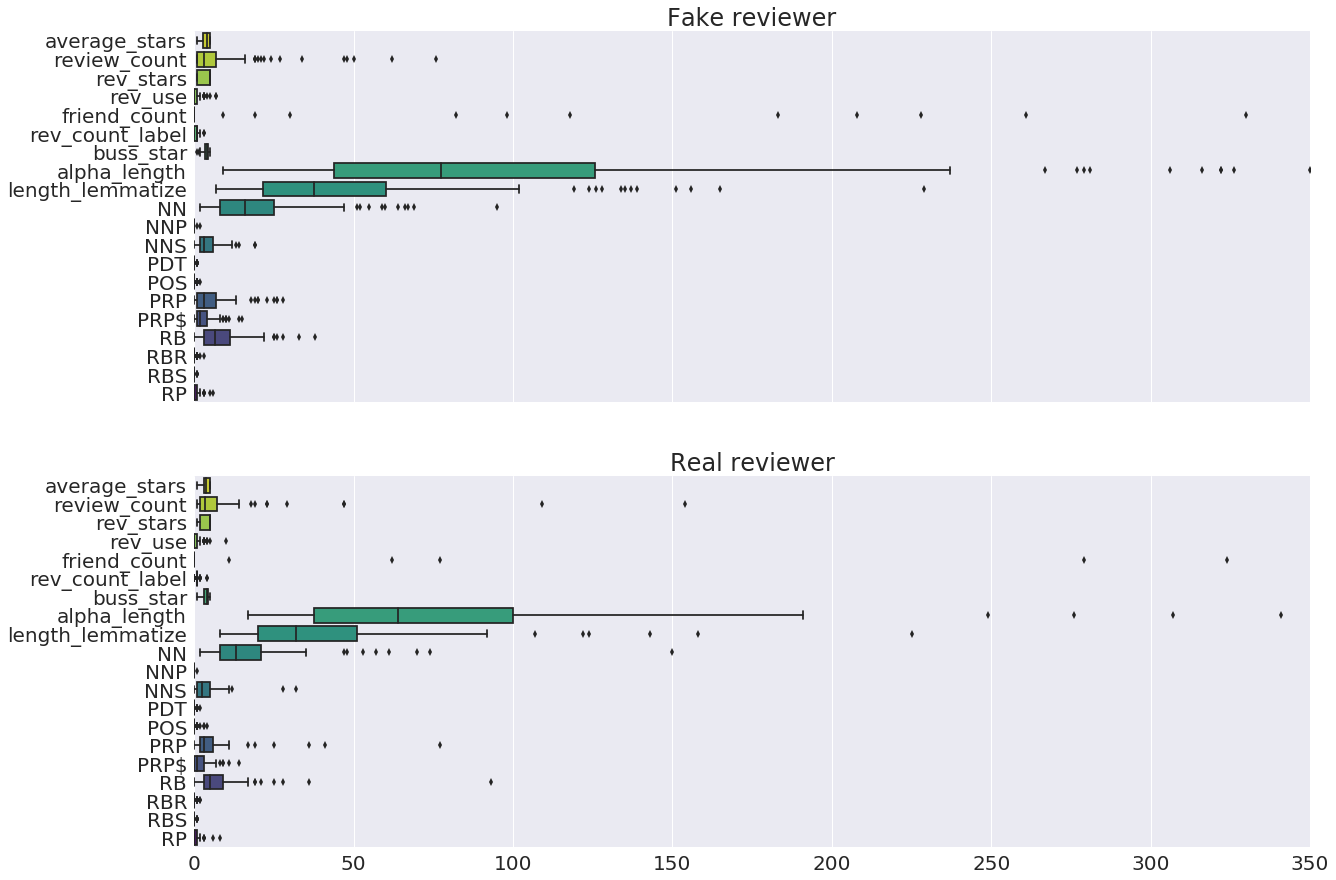

In [93]:
cols=' 	average_stars 	review_count  	  	rev_stars 	rev_use 	friend_count 	\
	rev_count_label 	buss_star 	alpha_length 	length_lemmatize 	NN 	NNP 	\
NNS 	PDT 	POS 	PRP 	PRP$ 	RB 	RBR 	RBS 	RP '.split()
New1=dataset1[cols]
New0=dataset0[cols]
f,(ax1,ax2) = plt.subplots(2, 1, sharex=True, figsize=(20,15))
lm1=sns.boxplot(data=New1, orient="h", palette= 'viridis_r',ax=ax1)
sns.set(font_scale = 2)
lm1.set(xlim=(0, 350))
ax1.set_title('Fake reviewer')
lm=sns.boxplot(data=New0, orient="h", palette= 'viridis_r',ax=ax2)
lm.set(xlim=(0, 350))
ax2.set_title('Real reviewer')

### Test-train split

In [138]:
feature_columns = 'average_stars 	review_count 	rev_length 	rev_stars 	rev_use 	\
 	buss_star 	alpha_length 	length_lemmatize 	NN 	NNP 	NNS 	PDT \
POS	PRP 	PRP$ 	RB 	RBR 	RBS 	RP 	VB 	VBD 	VBG 	VBN 	VBP 	VBZ 	WDT 	WP 	WRB'.split()
X = (cleaned_data[feature_columns])
y= cleaned_data['Faker']
X_train=X.values[:160,:]
X_test=X.values[160:,]
y_train =y.values[:160,]
y_test =y.values[160:,]
columns=['True Pos', 'False Pos', 'False Neg', 'True Neg', 'Accur', 'Recall', 'Prec', 'F1']
machine_learning=pd.DataFrame(columns=columns)
dtype = [('True Pos','int32'), ('False Pos','int32'), ('False Neg','float32'), ('True Neg','float32'),\
        ('Accur', 'float32'), ('Recall', 'float32'), ('Prec', 'float32'), ('F1', 'float32')]
values = np.zeros(10, dtype=dtype)
index = ['Row'+str(i) for i in range(1, len(values)+1)]
machine_learning = pd.DataFrame(values, index=index)

In [139]:
machine_learning.head()

,True Pos,False Pos,False Neg,True Neg,Accur,Recall,Prec,F1
Row1,0,0,0.0,0.0,0.0,0.0,0.0,0.0
Row2,0,0,0.0,0.0,0.0,0.0,0.0,0.0
Row3,0,0,0.0,0.0,0.0,0.0,0.0,0.0
Row4,0,0,0.0,0.0,0.0,0.0,0.0,0.0
Row5,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Logistic regression

In [140]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score



# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred =logreg.predict(X_test)
y_pred_train =logreg.predict(X_train)
score = accuracy_score(logreg.predict(X_train),y_train)
print(score)

0.725


In [141]:
def confusion(predictions, actuals):
    actuals=actuals.values[:,0] if isinstance(actuals,pd.DataFrame) else actuals
    
    true_pos= (predictions==1) & (actuals==1)
    true_pos.sum()
    true_neg= (predictions==0) & (actuals==0)
    true_neg.sum()
    false_pos= (predictions==1) & (actuals==0)
    false_pos.sum()
    false_neg= (predictions==0) & (actuals==1)
    false_neg.sum()
    
    prec=true_pos.sum()/(true_pos.sum()+false_pos.sum())
    accur=(true_pos.sum()+true_neg.sum())/(true_pos.sum()+false_pos.sum()+ \
                                           true_neg.sum()+ false_neg.sum())
    recall = true_pos.sum()/(true_pos.sum()+false_neg.sum())
    F1=2*(prec*recall/(prec+recall))
 
    return(true_pos.sum(), false_pos.sum(),false_neg.sum(),true_neg.sum(), accur,recall, prec, F1)

In [142]:
machine_learning.iloc[0]=np.array((confusion(y_pred_train, y_train.reshape((1, 160)))))

In [143]:
machine_learning.iloc[1]=np.array((confusion(y_pred, y_test.reshape((1, 40)))))

In [144]:
from sklearn.naive_bayes import MultinomialNB
# Predict the labels of the test set: y_pred
clf = MultinomialNB().fit(X_train, y_train)
y_pred =logreg.predict(X_test)
y_pred_train =logreg.predict(X_train)

In [145]:
machine_learning.iloc[2]=np.array((confusion(y_pred_train, y_train.reshape((1, 160)))))
machine_learning.iloc[3]=np.array((confusion(y_pred, y_test.reshape((1, 40)))))

In [146]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
y_pred =clf.predict(X_test)
y_pred_train =clf.predict(X_train)

In [147]:
machine_learning.iloc[4]=np.array((confusion(y_pred_train, y_train.reshape((1, 160)))))
machine_learning.iloc[5]=np.array((confusion(y_pred, y_test.reshape((1, 40)))))

In [151]:
machine_learning['Method']=['LogReg_train', 'LogReg_test', 'MNB_train', 'MNB_test', \
                           'RandClass_train', 'RandClass_test', '','','','' ]
machine_learning

,True Pos,False Pos,False Neg,True Neg,Accur,Recall,Prec,F1,Method
Row1,56.0,20.0,24.0,60.0,0.725,0.70,0.736842,0.717949,LogReg_train
Row2,13.0,7.0,7.0,13.0,0.650,0.65,0.650000,0.650000,LogReg_test
Row3,56.0,20.0,24.0,60.0,0.725,0.70,0.736842,0.717949,MNB_train
Row4,13.0,7.0,7.0,13.0,0.650,0.65,0.650000,0.650000,MNB_test
Row5,80.0,0.0,0.0,80.0,1.000,1.00,1.000000,1.000000,RandClass_train
Row6,13.0,7.0,7.0,13.0,0.650,0.65,0.650000,0.650000,RandClass_test
Row7,0.0,0.0,0.0,0.0,0.000,0.00,0.000000,0.000000,
Row8,0.0,0.0,0.0,0.0,0.000,0.00,0.000000,0.000000,
Row9,0.0,0.0,0.0,0.0,0.000,0.00,0.000000,0.000000,
Row10,0.0,0.0,0.0,0.0,0.000,0.00,0.000000,0.000000,


In [165]:
#Create a sparse text vectorizer used to train and test a simple supervised model. 
# Import the necessary modules
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

RT=review_texts['text']

X_train = RT.values[:160]
X_test= RT[160:]


# Transform the training data using only the 'text' column values: count_train 
count_train = count_vectorizer.fit_transform(X_train,y_train)

# Transform the test data using only the 'text' column values: count_test 
count_test = count_vectorizer.transform(X_test)

# Print the first 10 features of the count_vectorizer
print(count_vectorizer.get_feature_names()[:10])


['00', '03', '06', '10', '100', '10k', '11', '12', '13', '130']


In [166]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test)

# Print the first 10 features
print(tfidf_vectorizer.get_feature_names()[:10])

# Print the first 5 vectors of the tfidf training data
print(tfidf_train.A[:5])


['00', '03', '06', '10', '100', '10k', '11', '12', '13', '130']
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.23430276 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [167]:
# Create the CountVectorizer DataFrame: count_df
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

# Create the TfidfVectorizer DataFrame: tfidf_df
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

# Print the head of count_df
print(count_df.head())

# Print the head of tfidf_df
print(tfidf_df.head())

# Calculate the difference in columns: difference
difference = set(count_df.columns) - set(tfidf_df.columns)
print(difference)

# Check whether the DataFrames are equal
print(count_df.equals(tfidf_df))


   00  03  06  10  100  10k  11  12  13  130  14  15  16  20  2009  2013  \
0   0   0   0   0    0    0   0   0   0    0   0   0   0   0     0     0   
1   0   0   0   0    0    0   0   0   0    0   0   0   1   0     0     0   
2   1   0   0   0    0    0   0   0   0    1   0   0   0   0     0     0   
3   0   0   0   0    0    0   0   0   0    0   0   0   0   0     0     0   
4   0   0   0   0    0    0   0   0   0    0   0   0   0   0     0     0   

   2017  21  21st  23  24  25  25mins  29  2am  30  300  30am  35th  38  3d  \
0     0   0     0   0   0   0       0   0    0   0    0     0     0   0   0   
1     0   0     0   0   0   0       0   0    0   0    0     0     0   0   0   
2     0   0     0   0   0   0       0   0    0   0    0     0     0   0   0   
3     0   0     0   0   0   0       0   0    0   0    0     0     0   0   0   
4     0   1     0   0   0   0       0   0    0   0    0     0     0   0   0   

   40  45  458  50  55  5pm  70  75  85  90  95  ability  able  abso

### Line fitting

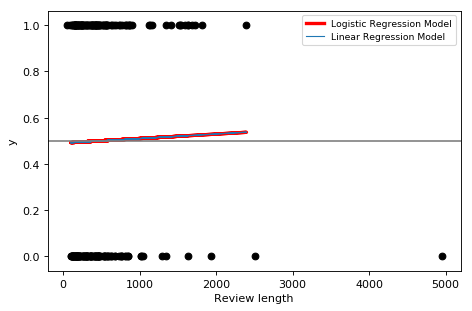

In [19]:
#cleaned_data[['average_stars', 'Faker']].plot(kind='scatter', x='average_stars', y='Faker')
feature_colums= 'rev_length'.split()
from matplotlib.pyplot import figure
figure(num=None, figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')
X = (cleaned_data[feature_colums])
y= cleaned_data['Faker']
X_train=X.values[:160,:]
X_test=X.values[160:,]
y_train =y.values[:160,]
# Fit the classifier
clf = LogisticRegression()
clf.fit(X_train, y_train)
# and plot the result
plt.clf()
plt.scatter(X, y, color='black', zorder=20)
def model(x):
    return 1 / (1 + np.exp(-x))

loss = model(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)
ols = linear_model.LinearRegression()
ols.fit(X_train, y_train)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
plt.axhline(.5, color='.5')

plt.ylabel('y')
plt.xlabel('Review length')
plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
           loc="upper right", fontsize='small')
plt.tight_layout()

plt.show()


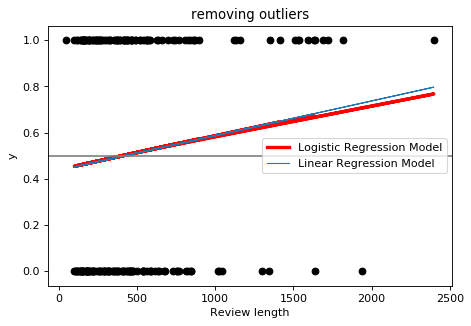

In [20]:
#cleaned_data[['average_stars', 'Faker']].plot(kind='scatter', x='average_stars', y='Faker')
feature_colums= 'rev_length'.split()
from matplotlib.pyplot import figure
figure(num=None, figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')
X = (cleaned_data[feature_colums])
X=X.drop(X.index[130])
X=X.drop(X.index[107])
#X= X.drop(X.index=p)
y= cleaned_data['Faker']
y=y.drop(y.index[130])
y=y.drop(y.index[107])
X_train=X.values[:160,:]
X_test=X.values[160:,]
y_train =y.values[:160,]
# Fit the classifier
clf = LogisticRegression()
clf.fit(X_train, y_train)
# and plot the result
plt.clf()
plt.scatter(X, y, color='black', zorder=20)
def model(x):
    return 1 / (1 + np.exp(-x))

loss = model(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)
ols = linear_model.LinearRegression()
ols.fit(X_train, y_train)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
plt.axhline(.5, color='.5')

plt.ylabel('y')
plt.xlabel('Review length')
plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
           loc="center right", fontsize='medium')
plt.tight_layout()
plt.title('removing outliers')
plt.show()


### Distribution of length of review for faker vs real profile
From the plot the faker profile has a $\mu = 500$ and the real profile has $\mu = 520$ higher than real profile. In real profile some outliers are present. The real profile dataset is left skewed mean (500) $<$ mode (592). The fake profile dataset is right skewed mean (520) $>$ mode (468). 
<br>
Faker $(min, max, \sigma, \mu) = 47, 2398.0, 476.1, 566.87 $
<br>
Real $(min, max, \sigma, \mu) =  99, 4950.0, 591.7, 502.9 $
<br>
The linear / logistic regression do not fit the data well because in both algorithms the error is minimised. Since the distribution is not uniform hence the fitting is not good. In the next plot removing the outlier that are $>$ 2500 the regression is trying to fit the dataset little better. If the dataset is equally distributed a line that is passing through (1000,1) and (900,0) would have fit the data perfectly. 

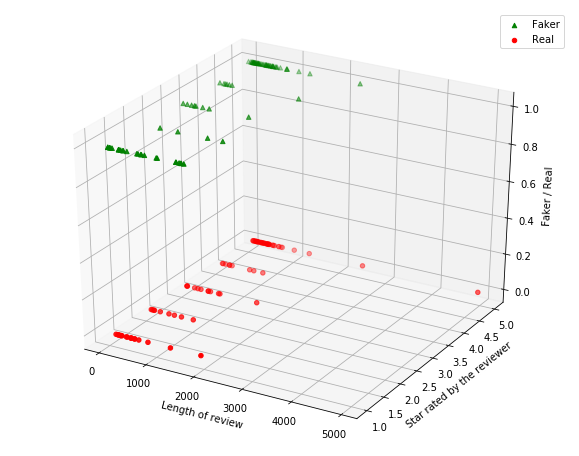

In [21]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset1['rev_length'], dataset1['rev_stars'], dataset1['Faker'], c='g', marker='^', label='Faker')
ax.scatter(dataset0['rev_length'], dataset0['rev_stars'], dataset0['Faker'], c='r', marker='o', label='Real')
ax.set_xlabel('Length of review')
ax.set_ylabel('Star rated by the reviewer')
ax.set_zlabel('Faker / Real')
ax.legend()

plt.show()

### Distribution of length of review  and star rated by reviewers
The distribution of stars for real reviews is almost uniformy spread for 1-5. Fake reviewers give more 1 or 5 stars. 

Text(0,0.5,'review count')

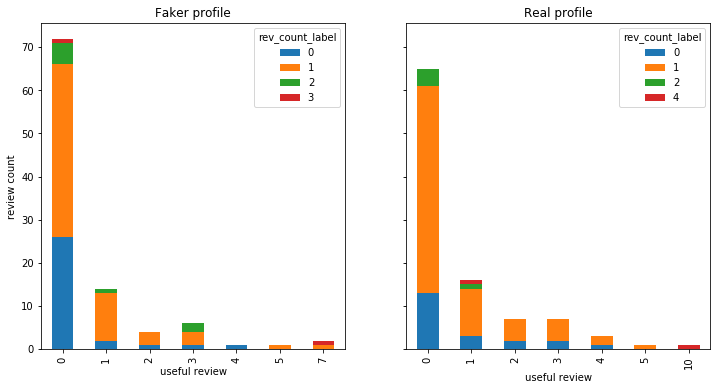

In [22]:
f,(ax1,ax2) = plt.subplots(1, 2, sharey='row', figsize=(12,6))
star_frnds_1 = pd.crosstab(index=dataset1['rev_use'], columns=dataset1['rev_count_label'])

star_frnds_1.plot(kind="bar", stacked=True, ax=ax1)
ax1.set_title('Faker profile')
ax1.set_xlabel('useful review')
ax1.set_ylabel('review count')
star_frnds_20 = pd.crosstab(index=dataset0['rev_use'], columns=dataset0['rev_count_label'])

star_frnds_20.plot(kind="bar", stacked=True, ax=ax2)
ax2.set_title('Real profile')
ax2.set_xlabel('useful review')
ax2.set_ylabel('review count')


### Relation between no. of reviews and usefulness
label=0 : Only one review.
<br>
label=1 : More than 1 and upto 20 reviews.
<br>
label=2 : More than 20 and upto 50 reviews.
<br>
label=3 : More than 50 and upto 100 reviews.
<br>
label=4 : More than 100 reviews.
 
Fake reviewer profiles about $>$ 30 one reviews i.e Fake reviewers write mostly one reviews compared to real real reviews who write more than one reviews. 

Text(0.5,0,'Business stars')

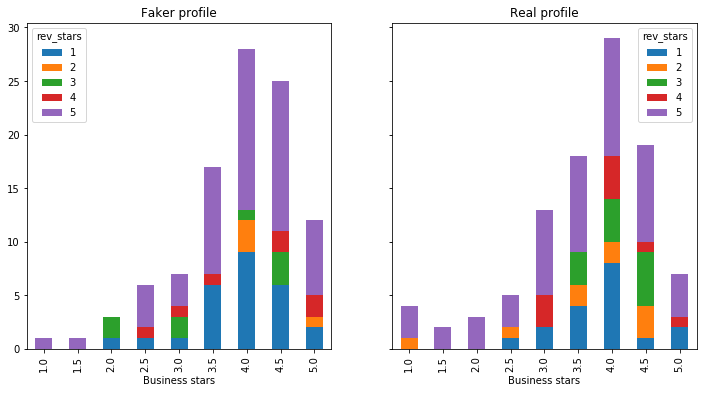

In [166]:
f,(ax1,ax2) = plt.subplots(1, 2, sharey='row', figsize=(12,6))
star_frnds_1 = pd.crosstab(index=dataset1['buss_star'], columns=dataset1['rev_stars'])

star_frnds_1.plot(kind="bar", stacked=True, ax=ax1)
ax1.set_title('Faker profile')
ax1.set_xlabel('Business stars')
star_frnds_20 = pd.crosstab(index=dataset0['buss_star'], columns=dataset0['rev_stars'])

star_frnds_20.plot(kind="bar", stacked=True, ax=ax2)
ax2.set_title('Real profile')
ax2.set_xlabel('Business stars')


### Distribution of actual Bussiness stars and stas rating given by reviewer
In case of a real profile 3.5, 4.0, 4.5 and 5 star bussiness received ratings more postive ratings than 1 and 2 stars. However in fake profile 3.5, 4.0 and 4.5 businesses are rated 1 stars by more than 7 fake reviewers.

In [32]:
from nltk.stem import WordNetLemmatizer
from collections import Counter
from nltk.corpus import stopwords
from nltk import pos_tag, word_tokenize
english_stops = set(stopwords.words('english'))
def wordNetLemmatizer(text):
# Import WordNetLemmatizer
    tokens = word_tokenize(text)
    lower_tokens = [t.lower() for t in tokens]
# Retain alphabetic words: alpha_only
    alpha_only = [t for t in lower_tokens if t.isalpha()]

    length_alpha = len(alpha_only)

# Print the 10 most common tokens
    return(length_alpha)

In [40]:
df1=[]
for i in range(rowsamples):
    a1=wordNetLemmatizer(review_texts['text'].iloc[i])
    df1.append(a1)
NetLemmatizer=pd.DataFrame({'alpha_length': df1})
NetLemmatizer.head()


,alpha_length
0,98
1,139
2,46
3,35
4,279


In [42]:
datasetnlp1=NetLemmatizer[cleaned_data['Faker']==1]
datasetnlp0=NetLemmatizer[cleaned_data['Faker']==0]

In [49]:
datasetnlp1.head()
datasetnlp0.mean()

alpha_length    92.3
dtype: float64

(array([35., 31., 13.,  6.,  3.,  5.,  5.,  1.,  0.,  1.]),
 array([  9. ,  54.4,  99.8, 145.2, 190.6, 236. , 281.4, 326.8, 372.2,
        417.6, 463. ]),
 <a list of 10 Patch objects>)

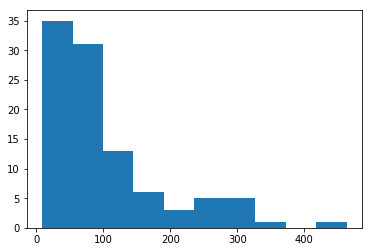

In [48]:
plt.hist(datasetnlp1['alpha_length'], bins=10)

randomforest, naivebayers(multimodal), quadritic_linear_regression

In [62]:
from nltk.stem import WordNetLemmatizer
from collections import Counter
from nltk.corpus import stopwords
from nltk import pos_tag, word_tokenize
english_stops = set(stopwords.words('english'))
def wordstop(text):
# Import WordNetLemmatizer
    tokens = word_tokenize(text)
    lower_tokens = [t.lower() for t in tokens]
# Retain alphabetic words: alpha_only
    alpha_only = [t for t in lower_tokens if t.isalpha()]

       
    # Remove all stop words: no_stops
    no_stops = [t for t in alpha_only if t not in english_stops]

    length_alpha = len(no_stops)
    
# Print the 10 most common tokens
    return(length_alpha)

In [63]:
df1=[]
for i in range(rowsamples):
    a1=wordstop(review_texts['text'].iloc[i])
    df1.append(a1)
stopwords=pd.DataFrame({'nostop_length': df1})
stopwords.head()


,nostop_length
0,46
1,72
2,18
3,18
4,137


In [64]:
datasetnlp1=stopwords[cleaned_data['Faker']==1]
datasetnlp0=stopwords[cleaned_data['Faker']==0]

(array([38., 32., 11.,  4.,  3.,  8.,  2.,  1.,  0.,  1.]),
 array([  7. ,  29.2,  51.4,  73.6,  95.8, 118. , 140.2, 162.4, 184.6,
        206.8, 229. ]),
 <a list of 10 Patch objects>)

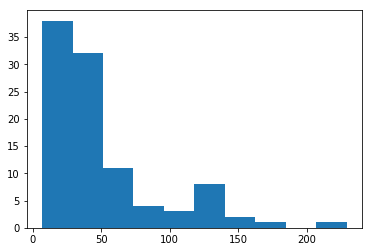

In [66]:
plt.hist(datasetnlp1['nostop_length'], bins=10)

(array([71., 20.,  5.,  2.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([  8. ,  47.9,  87.8, 127.7, 167.6, 207.5, 247.4, 287.3, 327.2,
        367.1, 407. ]),
 <a list of 10 Patch objects>)

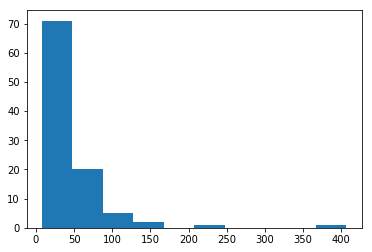

In [67]:
plt.hist(datasetnlp0['nostop_length'], bins=10)